<a href="https://colab.research.google.com/github/JoonghoonChoi/AI_01_Projects/blob/main/ds_cs_N434a_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://user-images.githubusercontent.com/6457691/90080969-0f758d00-dd47-11ea-8191-fa12fd2054a7.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 4 / SPRINT 3 / Assignment 4*

--- 
#   Generative Adversarial Networks (GAN)

# 기본과제

### 문항 1) GAN의 원리에 대한 설명으로 틀린 것은?
- Generative라는 말은 생성적인, 생산하는 이라는 뜻으로 이 모델을 이용해서 이미지 등을 생성하기 위함이다. o
- Adversarial은 '적대적인'이라는 뜻으로 모델에서는 두가지 길항작용을 하는 네트워크를 서로 대립시켜 서로 경쟁하면서 발전하는 것을 의미한다. o
- GAN에는 Discriminator(판별기)와 Generator(생성기)로 구성되어 있습니다. o
- Discriminator는 Latent noise를 통해서 가짜 데이터를 생성하는 역할입니다. x
        Generator가 latent noise를 통해 가짜 데이터를 생성하는 역할
        Discriminator는 가짜데이터와 진짜데이터에 대해 0/1 판별하는 역할
- Latent noise는 정규화된 분포나 균등한 분포를 따르게 되며, 이들을 연산함으로써 의미간 연산을 진행할 수 있습니다. x ???
        GAN의 일반적인 학습 방법 : 
        랜덤한 latent variable 생성자의 입력으로 넣어주기 때문에 컨트롤할 수가 없음. 
        결국 의미간 연산을 못하는게 아닌가?
        => 이를 극복하기 위해 latent variable에 컨디션y를 붙여준 cGAN

### 문항 2) GAN의 학습에 대한 설명으로 틀린 것은?
- 훈련 데이터(진짜 데이터)를 가지고 Discriminator(판별기)를 학습시킵니다. 이를 통해, 훈련 데이터의 분포를 학습합니다. o
- Latent noise를 통해 노이즈한 값을 Generator(생성기)에 주고, 생성기에서는 Fake 이미지를 생성합니다. 물론, 처음에는 굉장히 품질이 떨어지는 이미지를 생성합니다. o
- Fake 이미지는 Discriminator(판별기)에서 분류되며, Loss fucntion의 역전파를 통해 Generator(생성기)를 좀 더 진짜같은 데이터로 만들 수 있는 방향으로 학습하게 됩니다. o
- 실제수행할 때에는 Generator(생성기)의 성능이 안 좋은 경우가 많아, Generator를 더욱 많이 학습시켜 주기도 합니다. x
        Generator와 Discriminator의 학습을 반복적으로 수행
        두놈이 같이 발전하면서 실제데이터 분포와 생성자에서 만들어낸 데이터의 분포가 같아지면서 Discriminator가 평형상태(0.5)에 도달

### 문항 3) DCGAN에서 MNIST대신에 다른 이미지를 입력으로하여 Generation을 수행하시오. 과제를 수행하면서 다양한 생각을 해보시오.
  * 해당 과제는 GAN이라는 새로운 형태의 아키텍쳐에 익숙해지기 위해서, 새로운 데이터를 같은 네트워크에 넣어보기 위한 과제이다. 
  * 과제를 수행하면서, 초기 GAN 모델의 한계도 느껴보고, 이런 작업을 수행하면서 앞으로 GAN이 어떤 일을 수행하게 될 것인지 생각해보자.
  * 나는 GAN의 원리를 이해하였는가? (Yes/No)
  * GAN이 어떻게 학습되는 지 설명할 수 있는가? (Yes/No)
  * 왜 GAN이 시장에서 많이 사용될까?
  * 어떻게 응용할 수 있을까?

## celebA 데이터셋 불러오기 

In [85]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import gdown
from zipfile import ZipFile
import time

from IPython import display
import PIL
import imageio

In [231]:
dataset = keras.preprocessing.image_dataset_from_directory(
    "celeba_gan", label_mode=None, image_size=(64, 64), batch_size=32
)
dataset = dataset.map(lambda x: x / 255.)

Found 202599 files belonging to 1 classes.


In [232]:
dataset

<MapDataset shapes: (None, 64, 64, 3), types: tf.float32>

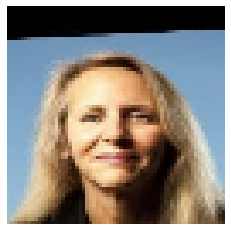

In [233]:
for x in dataset:
    plt.axis("off")
    plt.imshow((x.numpy() * 255).astype("int32")[0])
    break

In [234]:
dataset

<MapDataset shapes: (None, 64, 64, 3), types: tf.float32>

## Generator 구현

In [268]:
latent_dim = 128

def make_generator_model():
    model = keras.Sequential([
        keras.Input(shape=(latent_dim,)),
        layers.Dense(8 * 8 * 128),
        layers.Reshape((8, 8, 128)),
        layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(256, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(512, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(3, kernel_size=5, padding="same", activation="sigmoid"),
    ],
    name="generator",
    )
    return model

In [269]:
# def make_generator_model():
#     model = tf.keras.Sequential(name='generator')
#     model.add(layers.Dense(8*8*256, use_bias=False, input_shape=(128,)))
#     model.add(layers.BatchNormalization())
#     model.add(layers.LeakyReLU())

#     model.add(layers.Reshape((8, 8, 256)))
#     assert model.output_shape == (None, 8, 8, 256) # 주목: 배치사이즈로 None이 주어집니다.

#     model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
#     assert model.output_shape == (None, 8, 8, 128)
#     model.add(layers.BatchNormalization())
#     model.add(layers.LeakyReLU())

#     model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False)) # stride를 줘서 자체적으로 증폭되는 효과
#     assert model.output_shape == (None, 16, 16, 64)
#     model.add(layers.BatchNormalization())
#     model.add(layers.LeakyReLU())

#     model.add(layers.Conv2DTranspose(3, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
#     assert model.output_shape == (None, 32, 32, 3)

#     return model

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 8192)              1056768   
_________________________________________________________________
reshape_29 (Reshape)         (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_transpose_85 (Conv2DT (None, 16, 16, 128)       262272    
_________________________________________________________________
leaky_re_lu_135 (LeakyReLU)  (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_transpose_86 (Conv2DT (None, 32, 32, 256)       524544    
_________________________________________________________________
leaky_re_lu_136 (LeakyReLU)  (None, 32, 32, 256)       0         
_________________________________________________________________
conv2d_transpose_87 (Conv2DT (None, 64, 64, 512)       20

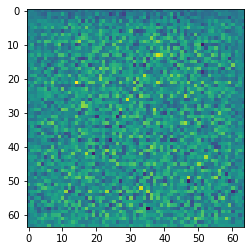

In [270]:
generator = make_generator_model()
generator.summary()

noise = tf.random.normal([1, 128])
generated_image = generator(noise, training=False)
plt.imshow(generated_image[0, :, :, 0]);

## Discriminator 구현

In [271]:
def make_discriminator_model(): 
    model = keras.Sequential([
        keras.Input(shape=(64, 64, 3)),
        layers.Conv2D(64, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(1, activation="tanh"),
    ],
    name="discriminator",
    )

    return model

In [272]:
# def make_discriminator_model():
#     model = tf.keras.Sequential(name='discriminator')
#     model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', # stride를 넣어주면 pooling효과
#                                      input_shape=[32, 32, 3]))
#     model.add(layers.LeakyReLU())
#     model.add(layers.Dropout(0.3))

#     model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
#     model.add(layers.LeakyReLU())
#     model.add(layers.Dropout(0.3))

#     model.add(layers.Flatten())
#     model.add(layers.Dense(1))

#     return model

In [273]:
discriminator = make_discriminator_model()
discriminator.summary()

decision = discriminator(generated_image)
print('\n', decision)

Model: "discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_59 (Conv2D)           (None, 32, 32, 64)        3136      
_________________________________________________________________
leaky_re_lu_138 (LeakyReLU)  (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 16, 16, 128)       131200    
_________________________________________________________________
leaky_re_lu_139 (LeakyReLU)  (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 8, 8, 128)         262272    
_________________________________________________________________
leaky_re_lu_140 (LeakyReLU)  (None, 8, 8, 128)         0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 8192)            

- 출력값이 음수 => fake image 라고 판별 
- 출력값이 양수 => real image 라고 판별 

## Loss function and Optimizer

In [274]:
# cross entropy loss function
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [275]:
def discriminator_loss(real_output, fake_output):
    '''
    Discriminator가 가짜이미지에서 진짜이미지를 잘 판별하는지 수치화
    진짜이미지 예측값과 1로 이루어진 행렬 비교
    가짜이미지 예측값과 0으로 이루어진 행렬 비교
    '''
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss

    return total_loss

def generator_loss(fake_output):
    '''
    Discriminator를 얼마나 잘 속였는지 수치화
    생성된 fake image에 대한 discriminator의 결정을 1로 이루어진 행렬과 비교
    '''
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [276]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4) # 0.0001
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

## Checkpoint

In [277]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

## 훈련루프

1. Generator가 입력값으로 랜덤시드를 받음
2. 시드값을 사용해 이미지 생성
3. Discriminator가 진짜ㅏ이미지와 가짜이미지를 분류
4. 각 모델의 손실 계산
5. Generator, Discriminator의 각중치 업데이트

In [278]:
EPOCHS = 30
noise_dim = 128
num_examples_to_generate = 16

seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [279]:
@tf.function
def train_step(images):
    batch_size = tf.shape(images)[0]
    noise = tf.random.normal([batch_size, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [280]:
def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()

    for image_batch in dataset:
        train_step(image_batch)

    # GIF를 위한 이미지를 바로 생성합니다.
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # 15 에포크가 지날 때마다 모델을 저장합니다.
    if (epoch + 1) % 15 == 0:
        checkpoint.save(file_prefix = checkpoint_prefix)
    
    # print (' 에포크 {} 에서 걸린 시간은 {} 초 입니다'.format(epoch +1, time.time()-start))
    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

    # 마지막 에포크가 끝난 후 생성합니다.
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                                epochs,
                                seed)

In [281]:
def generate_and_save_images(model, epoch, test_input):
    '''이미지 생성 및 저장'''
    # `training`이 False로 맞춰진 것을 주목하세요.
    # 이렇게 하면 (배치정규화를 포함하여) 모든 층들이 추론 모드로 실행됩니다. 
    predictions = model(test_input, training=False)

    fig = plt.figure(figsize=(4,4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5)
        plt.axis('off')

    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

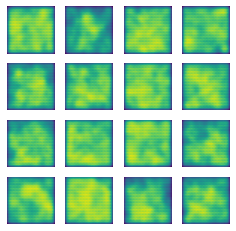

CPU times: user 3min, sys: 29.9 s, total: 3min 30s
Wall time: 5min 48s


In [282]:
%%time
train(dataset, EPOCHS)

In [283]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [284]:
# 에포크 숫자를 사용하여 하나의 이미지를 보여줍니다.
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

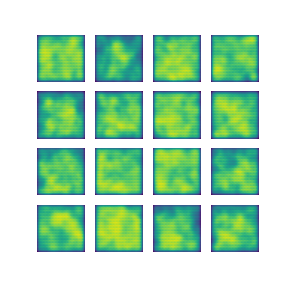

In [285]:
display_image(EPOCHS)

이게 도대체 뭔가.. 절망적이다 뭐가 잘못된걸까
다시해봐야겠다

In [286]:
anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  last = -1
  for i,filename in enumerate(filenames):
    frame = 2*(i**0.5)
    if round(frame) > round(last):
      last = frame
    else:
      continue
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)

import IPython
if IPython.version_info > (6,2,0,''):
  display.Image(filename=anim_file)

In [287]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download(anim_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 생각해보기

- 딥러닝 마지막 수업이 끝났다. 과연 딥러닝을 내가 사용하게 될까? 사용하게 된다면 어떤 분야를 사용하게 될까? 
        정말 어려웠고, 이해하지 못한 부분이 태산이라 많이 아쉽다.
        그래도 새로운걸 공부한다는게 재밌다! 더 공부해서 언젠가 꼭 써먹으리

- **문항 4) 내가 생각하는 딥러닝에서 가장 중요하다고 생각되는 부분에 대해서 웹 페이지를 찾아보고, 가장 비슷한 부분의 링크를 입력하시오 (너무 오래된 글은 피할 것)**
        패턴(?)을 학습해서 결과물을 내뱉는 딥러닝 모델에 대해 어떻게 하면 사람이 더 이해할 수 있을까?
        아직 제대로 모델 다룰 줄도 모르면서 모델을 이해하고 활용하는 부분이 가장 중요하다고 생각된다
        그리고 결국 양질의 데이터를 가지고 무엇을 할 지가 가장 중요한 것 같다
        https://www.hankookilbo.com/News/Read/A2021011713510002673
        https://blog.apaonline.org/2020/08/13/the-ethics-of-deep-learning-ai-and-the-epistemic-opacity-dilemma/

- **문항 5) 위 링크에서 말하는 것과 내가 보는 관점이 다른 점이 있다면 설명하시오**
        어느정도 위 링크에서 말하는 것에 공감한다.
        시대는 이미 변하고 있다. 너무 인공지능(딥러닝) 기술을 비관적으로 보기만 할게 아니라 
        데이터 독과점 문제, 개발자의 직업윤리, 사용자의 윤리의식 모든게 기본적으로 갖추어져야 하지 않을까

- **문항 6) 나에게 딥러닝이란?** 
        나에게 딥러닝이란 살면서 접한 공부중 가장 어려운것..
        아직깍지 확실히 내가 이 기술로 뭘 할 수 있을지 확신이 서지 않는다.
        더 열심히 공부하면 보이지 않을까ㅎㅎ
        부트캠프에 들어오기 전 기술을 굳이 계속해서 발전시켜야만하냐는 비관적인 시선이 있었다. 
        이생각이 모조리 바뀐건 아니지만 어느정도 딥러닝 기술로 구현할 수 있는 수많은 것들에 공감이 가기 시작했다.
        기술발전과 이를 받아들이는 시선이 함께 발전할수있길!
        나도 함께 발전하길!
    
<br> 
공백으로 제출하지만 않으면 채점 시 감점은 없다. <br> 다만, 인공지능으로 가장 이슈를 만들엇던 딥러닝에 대한 나의 견해를 가지고 있는 것은 중요하기 때문에 다소 철학적인 대답이어도 좋고, 앞으로 인공지능의 미래에 대해서 생각해보아도 좋다. 다른 사람들과 같이 논의해보고 싶은 주제를 던져도 좋다.

# 도전과제
- 온라인에서 GAN의 변천사에 대해서 조사해보고 코드를 구현하고, 각각의 모델의 동작 원리를 파악해본다. 
- 실무에서는 내가 직접 개발할 수도 있겠지만, 온라인에 공개된 좋은 데이터와 학습된 구조를 잘 이용할 수 있는 것이 능력입니다. 한편 각각의 모델의 장단점을 알아야 원하는 프로젝트를 목적에 맞게 구현할 수 있습니다. 스프린트의 마지막 과제는 온라인에 무차별적으로 검증되지 않은 데이터들을 탐색해보고 따라서 구현해보는 과제를 한번 더 내도록 하겠습니다.  C.f. Kaggle에서 잘 된 notebook을 찾아보거나, 검색어와 더불어 'git' 또는 'github'을 같이 입력하여 서칭하는 것이 좋습니다. :)
- [ ] Conditional GAN
- [ ] StarGAN
- [ ] StyleGAN
- [ ] DiscoGAN
- [ ] AdaIN - Style Transfer (Note 확인 필요)
- [ ] etc

# 프로젝트 준비
- 과제를 진행하면서 많은 데이터들을 사용해보았습니다. 
- 이제는 정말 내가 무엇을 하고 싶은지, 어떤 회사에 들어가서 어떤 종류의 딥러닝 과제를 하고 싶은지 찾고, 발전하는 과정이 필요합니다. T자형 인재가 되기위한 과정으로 과제를 진행하며 내가 꼭 해보고 싶은 데이터를 찾아봅시다.